<a href="https://colab.research.google.com/github/PraveenPrabhat125/Python-for-Data-Analyst/blob/main/Exploratory_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction
In this final assignment, I will use a dataset from a survey held by NHANES in 2015-2016. I collected the dataset from kaggle. I will conduct descriptive and diagnostic analysis with the aim to collect and compare data of BMI in different age group and gender.

This dataset consists of 28 columns and 5735 rows. Among 28 columns, I isolated some columns which are related to my analysis.

Brief explanation of the column :

- SEQN = Respondent sequence number (
- SMQ020 = Smoking
- RIAGENDR = Gender
- RIDAGEYR = Age (years)
- DMDEDUC2 = Education level
- BMXWT = Weight (kg)
- BMXHT = Height (cm)
- BMXBMI = BMI

In [115]:
# 1. Import library and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [116]:
# 2. Retrinving Data
path = '/content/NHANES.csv'
df = pd.read_csv(path)

In [117]:
df.shape

(5735, 28)

In [118]:
# isolte the columnn required
data = df.loc[:, ('SEQN', 'SMQ020', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'BMXWT', 'BMXHT', 'BMXBMI')]
data.head()

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB


In [120]:
# Chnage the column names to ease the use
data.columns = ['seqn', 'smoking', 'gender',
                'age', 'education', 'weight', 'height',  'bmi']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seqn       5735 non-null   int64  
 1   smoking    5735 non-null   int64  
 2   gender     5735 non-null   int64  
 3   age        5735 non-null   int64  
 4   education  5474 non-null   float64
 5   weight     5666 non-null   float64
 6   height     5673 non-null   float64
 7   bmi        5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB


In [121]:
data.head()

,seqn,smoking,gender,age,education,weight,height,bmi
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [122]:
data.shape

(5735, 8)

## Result
Dataset with 5735 rows and 8 columns. The dataset contain 3 categorical variables and 4 columns with numerical data.

1. Categorical = Smoking, gender, education
2. Numerical = age, weight, hight, bmi

## 3. Data cleaning
1. Check for duplicate or unnecessary data
2. check for null values or missing data
3. check outliers

#### 3.1 Check for duplicate or unnecessary data

In [123]:
data[data.duplicated()]

,seqn,smoking,gender,age,education,weight,height,bmi


-There is no duplicate data in this datset.
- will drop the seqn column as not making much explanation about the data

In [124]:
data.drop('seqn', axis = 1, inplace = True)

In [125]:
df = data
df.head()

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


-3.2 Check for missing and null values

In [126]:
df.isnull().sum()

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64

In [127]:
df.shape

(5735, 7)

### Result
1. education, height, weight, and bmi have null values

- As missing and null values count is less so, we can drop these row.
I will drop them too because the number of missing values are very samll as compared to the dataset (> 5000 rows)

In [128]:
df.dropna(inplace = True)
df.shape

(5406, 7)

#### 3.3 Find outliers and handle outliers
- I have three numerical data(weight, age, bmi), so i will try to find outliers from these columns using the histogram and boxplot

In [129]:
df.head()
numerical = ['age', 'weight', 'height', 'bmi']
df[numerical].describe()

,age,weight,height,bmi
count,5406.000000,5406.000000,5406.000000,5406.000000
mean,49.390122,81.715594,166.055679,29.541861
std,17.640915,21.775173,10.107149,7.076574
min,20.000000,32.400000,129.700000,14.500000
25%,34.000000,66.300000,158.600000,24.500000
50%,49.000000,78.500000,165.900000,28.500000
75%,64.000000,93.200000,173.400000,33.200000
max,80.000000,198.900000,202.700000,67.300000


### fix, axs = plt.subplots(2,2, figsize = (15,16)

- The line of code fig, axs = plt.subplots(2,2, figsize=(15, 10)) is used to create a grid of subplots in a Matplotlib figure. Here's a detailed explanation of what each part of this line does:

plt.subplots(2, 2, figsize=(15, 10))
plt.subplots:
- This function creates a figure and a grid of subplots with a single call.
- 2, 2: These arguments specify the number of rows and columns in the subplot grid.

- In this case, it creates a 2x2 grid of subplots, so there will be a total of 4 subplots arranged in 2 rows and 2 columns.

- figsize=(15, 10): This argument sets the size of the entire figure. figsize is a tuple specifying the width and height of the figure in inches. In this case, the figure will be 15 inches wide and 10 inches tall.


#### fig and axs
- fig: This variable holds the figure object, which is the overall container that can contain multiple subplots.

- axs: This variable is an array-like object containing the individual axes objects (subplots). Since the subplot grid is 2x2, axs will be a 2x2 array

<Axes: xlabel='bmi', ylabel='Count'>

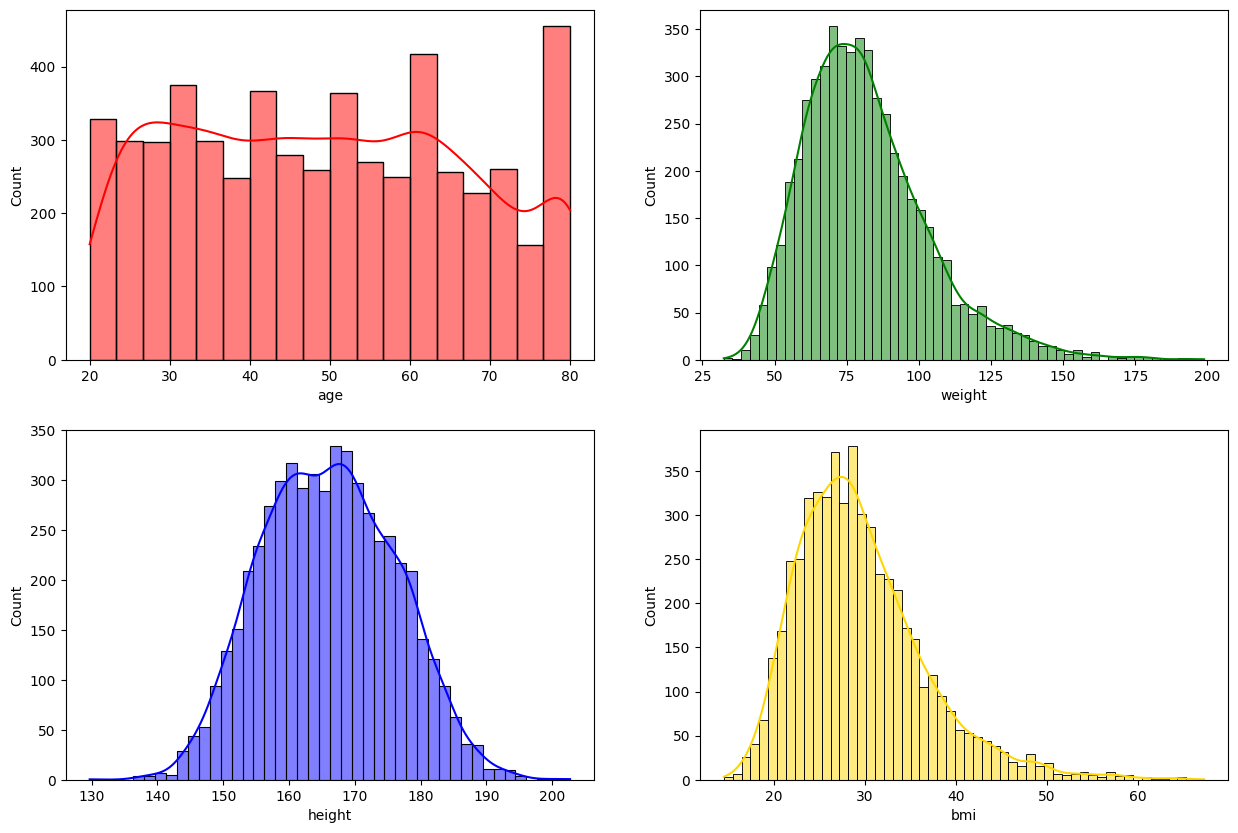

In [130]:
fig, axs = plt.subplots(2,2, figsize = (15, 10)) # 2 X 2 metric where we can add 4 different graps

sns.histplot(data = df, x = 'age', kde = True, color = 'r', ax = axs[0,0])


sns.histplot(data = df, x = 'weight', kde = True, color = 'g', ax = axs[0,1])


sns.histplot(data = df, x = 'height', kde = True, color = 'b', ax = axs[1,0])


sns.histplot(data = df, x = 'bmi', kde = True, color = 'gold', ax = axs[1,1])

### Result
1. Height has a normal distribution, where as weight and bmi is bit  right skewed distribution.

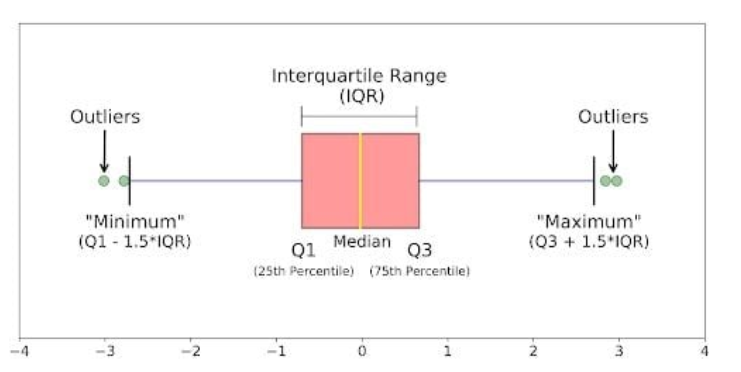


[link text](https://)

<Axes: xlabel='bmi'>

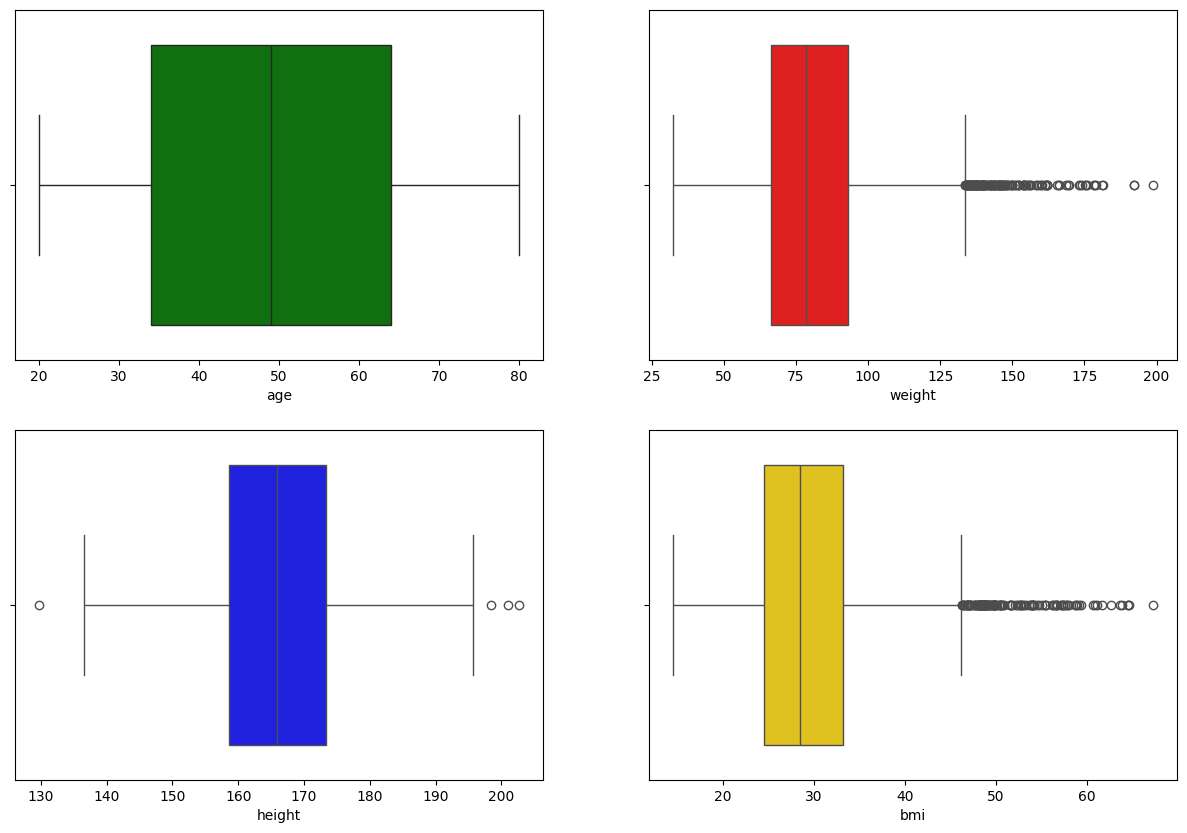

In [131]:
# boxplot to observed the distribution of numerical values

fig, axs = plt.subplots(2,2, figsize = (15,10))

sns.boxplot(data = df, x = 'age', ax = axs[0,0], color = 'g')


sns.boxplot(data = df, x = 'weight', ax = axs[0,1], color = 'r')


sns.boxplot(data = df, x = 'height', ax = axs[1,0], color = 'b')


sns.boxplot(data = df, x = 'bmi', ax = axs[1,1], color = 'gold')

### Result:
1. age has no outliers
2. weight, height, bmi have outliers above max value

- Observation
1. Height have outlier on both min and max values of height
2. bmi and weight have outliers more then max values.


#### Note
1. Median (Q2/50th percentile): The middle value of the data set
2. First Quartile (Q1/25th percentile): The middle number between the smallest number (not the “minimum”) and the median of the data set
3. Third Quartile (Q3/75th percentile): The middle value between the median and the highest value (not the “maximum”) of the dataset
4. Interquartile Range (IQR): 25th to the 75th percentile
Whiskers (shown in blue)
- Outliers (shown as green circles)
- “Minimum”: Q1 - 1.5*IQR
- “Maximum”: Q3 + 1.5*IQR

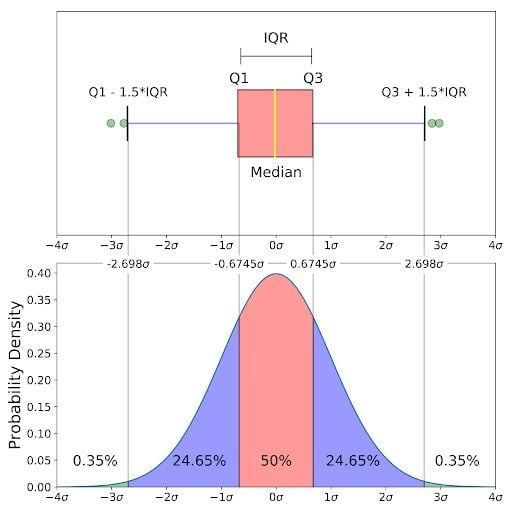

In [132]:
# Height
qh25, qh50, qh75 = np.percentile(df['height'], [25, 50,75])

print(qh25, qh50, qh75)

# @ inter quantile range
iqrh = qh75-qh25
print(iqrh)


minh  = qh25 - 1.5*iqrh
maxh  = qh75 + 1.5*iqrh

print(minh, maxh)

# lets remove  the outliers


# df[df[df['height'] < minh]  & df[df['height'] >  maxh] ]


158.6 165.9 173.4
14.800000000000011
136.39999999999998 195.60000000000002


### Why 1.5*i1rh

#### Empirical Basis:

 - The 1.5 multiplier is derived from the properties of the normal distribution.

- For a normally distributed dataset, about 99.3% of the data points are expected to lie within the range of Q1 - 1.5IQR to Q3 + 1.5IQR.

-
This means that only a small percentage of points (about 0.7%) will be considered outliers, which aligns well with typical expectations for outlier detection.

In [133]:

df = df[(df['height'] > minh) & (df['height'] < maxh)]

In [134]:
df.head()

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


In [143]:
# weight
qh25, qh50, qh75 = np.percentile(df['weight'] , [25, 50 , 75])
print(qh25, qh50, qh75)

# maxh
iqrh = qh75 - qh25


maxh = qh75  + 1.6*iqrh


# choose the data of iqr only

df = df[(df['weight'] < maxh)]


66.3 78.5 93.1


In [148]:
# bmi
qh25, qh50, qh75 = np.percentile(df['bmi'], [25, 50, 75] )

iqrh = qh75-qh25

minh = qh25 - 1.5*iqrh

# choose all the data point > minh

df = df[(df['bmi'] > minh)]

In [158]:
maxh = qh75 + 1.5*iqrh
df = df[(df['bmi'] < maxh)]

<Axes: ylabel='bmi'>

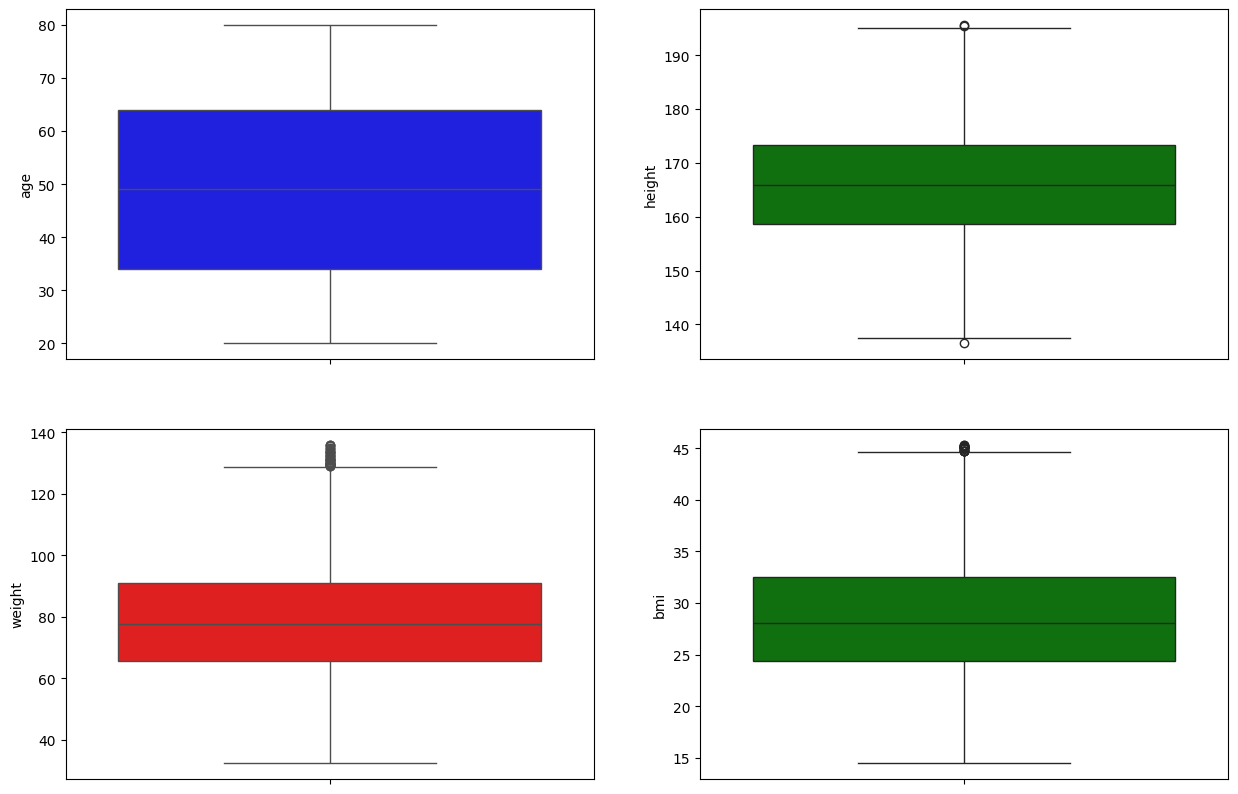

In [159]:
fig, axs  = plt.subplots(2,2, figsize = (15, 10))

sns.boxplot(df['age'], ax = axs[0,0], color = 'b')

sns.boxplot(df['height'], ax = axs[0,1], color = 'g')

sns.boxplot(df['weight'], ax = axs[1,0], color = 'r')

sns.boxplot(df['bmi'], ax = axs[1,1], color = 'g')


### Result
- Numeriacl value is now free from outliers, the result data with normal distribution

<Axes: xlabel='bmi', ylabel='Count'>

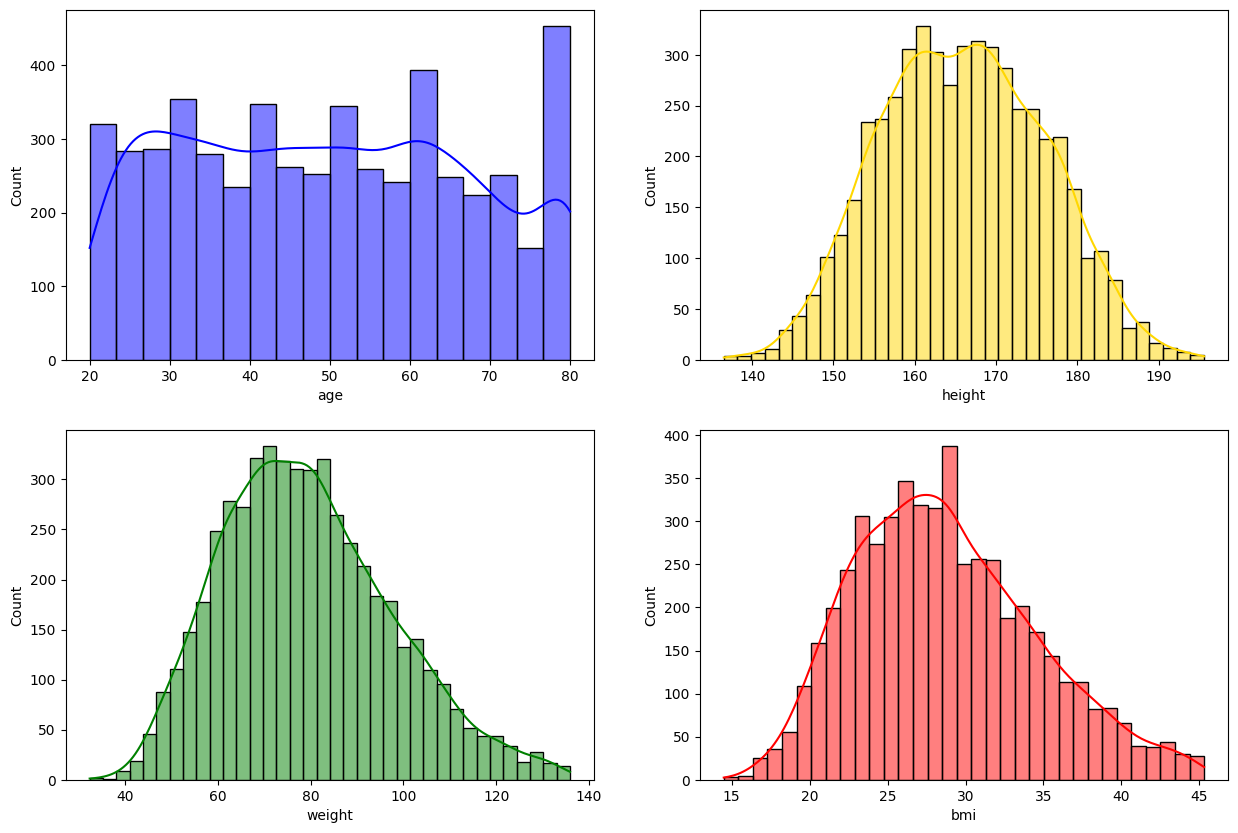

In [170]:
fig, axs = plt.subplots(2,2, figsize = (15,10))

sns.histplot(data = df, x = 'age', ax = axs[0,0], kde = True, color = 'b')

sns.histplot(data = df, x = 'height', ax = axs[0,1], kde = True, color = 'gold')

sns.histplot(data = df, x = 'weight', ax = axs[1,0], kde = True, color = 'g')

sns.histplot(data = df, x = 'bmi', ax = axs[1,1], kde = True, color = 'r')

In [160]:
df.shape

(5190, 7)